In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [2]:
dt=pd.read_csv('results.csv')

In [3]:
dt.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


the column 'division','overall','genderdiv'  is stand for the participant position in the race based on gender,kind of race.
from the information i found on the internet , bib is the id of participant based on kind of race.
W is for wheelchair. 
F is for female running.
and only number is male running.

In [4]:
dt.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

From the data . i see the time they finish marathon is 'official' column , but it in object format , so i will change it to number . 
i have my focus in 'age' and 'official' and i have a hypothesize that 'official' is different with group of 'age'. 

Change the 'official' type from object to number.

In [5]:
dt['official']=dt['official'].apply(pd.to_numeric, errors = 'coerce')
dt['10k']=dt['10k'].apply(pd.to_numeric, errors = 'coerce')
dt['20k']=dt['20k'].apply(pd.to_numeric, errors = 'coerce')
dt['30k']=dt['30k'].apply(pd.to_numeric, errors = 'coerce')
dt['40k']=dt['40k'].apply(pd.to_numeric, errors = 'coerce')


In [6]:
dt.describe()

,10k,division,age,official,genderdiv,overall,pace,30k,20k,40k
count,31934.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31944.000000,31933.000000,31945.000000
mean,51.799275,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658,164.571219,105.711669,229.001490
std,8.965513,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486,33.953683,19.780525,49.159902
min,16.620000,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000,56.450000,36.100000,76.100000
25%,45.400000,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000,140.670000,91.750000,193.820000
50%,50.330000,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000,157.730000,102.150000,218.850000
75%,57.170000,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000,182.880000,116.520000,257.450000
max,112.380000,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000,376.380000,224.350000,508.350000


From describe table we can clearly see that 75% of participant have age around 50 and the limit age to join the race is above 18 yrs, no upper limit for age <br>
And the count on official is different so i drop all drow have null value in official column. <br>

In [7]:
dt=dt.dropna(subset=['40k', '10k','30k'])

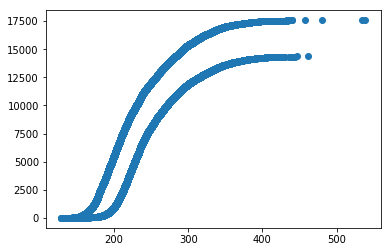

In [8]:
x=dt['official'][~dt['bib'].str.contains('W')]
y=dt['genderdiv'][~dt['bib'].str.contains('W')]
plt.scatter(x, y, alpha=1)
plt.show()

As we can see from the graph , in the same time , the position is different between male and female.<br>
The line for woman is under and man is upper , the position for woman is higher when have the same finish time. 

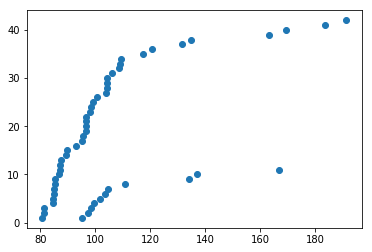

In [9]:
x=dt['official'][dt['bib'].str.contains('W')]
y=dt['genderdiv'][dt['bib'].str.contains('W')]
plt.scatter(x, y, alpha=1)
plt.show()

In [10]:
dt.dropna(subset=['official'],inplace=True)

In [11]:
dt = pd.get_dummies(dt, columns=["gender"])

In [12]:
dt["Disable"]=0

In [13]:
dt["Disable"][(dt['bib'].str.contains('W')==True)]= 1
dt["Disable"][(dt['bib'].str.contains('W')==False)]=0

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
feature_cols=['Disable','overall','gender_F','gender_M','official']
X=dt[feature_cols]
pca = PCA(n_components=2)
X_new=pca.fit_transform(X)

In [15]:
print(X_new)

[[-1.59079670e+04 -7.18687367e+01]
 [-1.58946781e+04 -1.82464513e+01]
 [-1.59149919e+04 -7.64809381e+01]
 ...
 [ 9.17672871e+03 -1.01484735e+01]
 [ 1.15608058e+04 -2.25123784e+00]
 [-1.07141190e+03 -8.67901152e+00]]


Now i will do and k-mean clustering between 'age' and 'official'
But i want to test the efficiency for different number of clusters , i will use an loop to run k-mean with different number of clusters and choose the best case based on the silhouette score.

### 1/ K-means clustering.

In [ ]:
clusters=[2,3,4,5,6,7,8]
a=X_new
for number in clusters:
    kmeans = KMeans(number, random_state=0)
    result = kmeans.fit_predict(a)
    silhouette_avg = silhouette_score(a, result)
    fig, (ax2) = plt.subplots(1)
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(result.astype(float) / number)
    ax2.scatter(a[:, 0], a[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    print("For n_clusters =", number,"The average silhouette_score is :", silhouette_avg)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')


For n_clusters = 2 The average silhouette_score is : 0.5376479153093278 <br>
For n_clusters = 3 The average silhouette_score is : 0.46776155873189174 <br>
For n_clusters = 4 The average silhouette_score is : 0.4320362358070203 <br>
For n_clusters = 5 The average silhouette_score is : 0.40735777139395873 <br>
For n_clusters = 6 The average silhouette_score is : 0.38544754017254446 <br>
For n_clusters = 7 The average silhouette_score is : 0.3662045066597228 <br>
For n_clusters = 8 The average silhouette_score is : 0.34492257895003064 <br>

From the result of silhouette_score we can see the best number of cluster for kmeans is 2.

### 2/ Mean Shift clustering.

In [ ]:
qt=[0.1,0.2]
for quant in qt:
    a=X.values
    bandwidth = estimate_bandwidth(a, quantile=quant)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    result = ms.fit_predict(a)
    silhouette_avg = silhouette_score(a, result)
    print("For quantile =", quant,"The average silhouette_score is :", silhouette_avg)

For quantile = 0.1 The average silhouette_score is : 0.3747231056490832 <br>
For quantile = 0.2 The average silhouette_score is : 0.37381604716089645 <br>

For cluster using MeanShift , when i use quantile over 0.2 there are error on my model so i use only 0.1 and 0.2 for quantile , and the result show that for qualtile =0.1 the model are better. 
The result when compare with kmean is much lower.

### 3/ DBSCAN  Clustering.

Next,i will use the DBSCAN to cluster, with the change in eps parameter.

In [ ]:
a=X.values
ep=[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9]
for i in ep:
    db = DBSCAN(eps=i, min_samples=5)
    result = db.fit_predict(a)
    silhouette_avg = silhouette_score(a, result)
    print("For eps=",i,"The average silhouette_score is :", silhouette_avg)

For eps= 0.1 The average silhouette_score is : -0.7454988600902304 <br>
For eps= 0.2 The average silhouette_score is : -0.5500833114826047 <br>
For eps= 0.3 The average silhouette_score is : -0.3732881664721746 <br>
For eps= 0.4 The average silhouette_score is : -0.2826773969367739 <br>
For eps= 0.5 The average silhouette_score is : -0.26260844237542424 <br>
For eps= 0.7 The average silhouette_score is : -0.3335863605040074 <br>
For eps= 0.8 The average silhouette_score is : -0.347475068082284 <br>
For eps= 0.9 The average silhouette_score is : -0.39630005091769194 <br>

the silhouette_score highest when eps=0.5, but in overall the score is still very low 

### 4/ Conclusion 

After using 3 method of clustering , i see the K-means have highest silhouette_score and take short time to calculate. <br>
For other methods like Affinity propagation and Spectral clustering , my colab notebook return runtime died so i cant show the result. <br>